# Proyek Analisis Data: Bike Sharing
- Nama:Dinar Nur Aziz
- Email: dinarnuraziz@gmail.com
- Id Dicoding:Dinar Nur Aziz

## Menentukan Pertanyaan Bisnis

- Apakah ada waktu atau hari tertentu dalam seminggu yang lebih baik untuk menawarkan promosi sepeda?

- Perental mana yang lebih sering merental sepeda dari tahun 2011 sampai 2012?

- Apakah Musim memengaruhi jumlah perental? Musim apa yang paling banyak orang merental sepeda?

## Menyiapkan semua library yang dibutuhkan

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [68]:
df = pd.read_csv('./Bike-sharing-dataset/day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [70]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [71]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [72]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

#### Memperbaiki tipe data

In [73]:
df["dteday"] = pd.to_datetime(df["dteday"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

## Exploratory Data Analysis (EDA)

### Explore Bike Sharing / day

In [74]:
df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
183,184,2011-07-03,3,0,7,0,0,0,2,0.716667,0.668575,0.68250,0.228858,2282,2367,4649
14,15,2011-01-15,1,0,1,0,6,0,2,0.233333,0.248112,0.49875,0.157963,222,1026,1248
195,196,2011-07-15,3,0,7,0,5,1,1,0.663333,0.624371,0.59125,0.182833,1318,4220,5538
491,492,2012-05-06,2,1,5,0,0,0,2,0.562500,0.546737,0.74000,0.149879,2135,4224,6359
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.00000,0.261877,46,577,623


In [75]:
# Rename season,yr,weekday
df['season'] = df['season'].replace([1,2,3,4],['Spring','Summer','Fall','Winter'])
df['yr'] = df['yr'].replace([0,1],[2011,2012])
df['weekday'] = df['weekday'].replace([0,1,2,3,4,5,6],['Sun','Mon','Tue','Wed','Thu','Fri','Sat'])

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Sat,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,0,Sun,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,0,Mon,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,0,Tue,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,0,Wed,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [76]:
casual = df.groupby('yr').sum()['casual']
registered = df.groupby('yr').sum()['registered']

print("Total jumlah rental untuk pengguna casual:")
print(casual)

print("\nTotal jumlah rental untuk pengguna terdaftar:")
print(registered)




Total jumlah rental untuk pengguna casual:
yr
2011    247252
2012    372765
Name: casual, dtype: int64

Total jumlah rental untuk pengguna terdaftar:
yr
2011     995851
2012    1676811
Name: registered, dtype: int64


C:\Users\dinar\AppData\Local\Temp\ipykernel_21120\2096660605.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  casual = df.groupby('yr').sum()['casual']
C:\Users\dinar\AppData\Local\Temp\ipykernel_21120\2096660605.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  registered = df.groupby('yr').sum()['registered']


In [77]:
# hitung perental berdasarkan season
season = df.groupby('season').sum()['cnt']
season


C:\Users\dinar\AppData\Local\Temp\ipykernel_21120\3437960589.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season = df.groupby('season').sum()['cnt']


season
Fall      1061129
Spring     471348
Summer     918589
Winter     841613
Name: cnt, dtype: int64

In [78]:
# hitung perental bedasarkan hari
weekday = df.groupby('weekday').sum()['cnt']
weekday

C:\Users\dinar\AppData\Local\Temp\ipykernel_21120\2913331233.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekday = df.groupby('weekday').sum()['cnt']


weekday
Fri    487790
Mon    455503
Sat    477807
Sun    444027
Thu    485395
Tue    469109
Wed    473048
Name: cnt, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah ada waktu atau hari tertentu dalam seminggu yang lebih baik untuk menawarkan promosi sepeda?

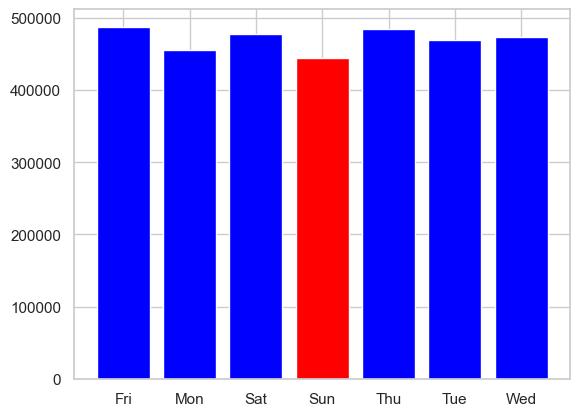

In [79]:
# visualisasi data perental berdasarkan hari
# Temukan indeks bar dengan frekuensi paling rendah
min_index = np.argmin(weekday)

# Tentukan warna untuk setiap bar
colors = ['blue' if i != min_index else 'red' for i in range(len(weekday))]

# Definisikan kategori dan data
categories = weekday.index
data = weekday.values

# Buat bar plot
plt.bar(categories, data, color=colors)

# Tampilkan plot
plt.show()

### Pertanyaan 2: Perental mana yang lebih sering merental sepeda dari tahun 2011 sampai 2012?

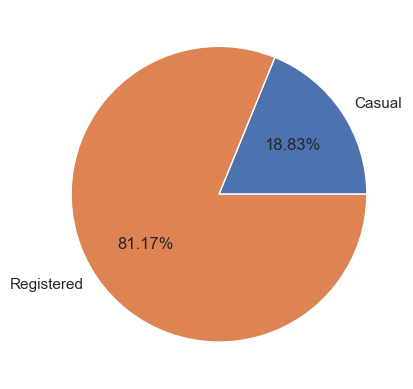

In [80]:
# visualisasi data perental berdasarkan tipe perental

labels = ['Casual', 'Registered']
data = [casual.sum(), registered.sum()]
sns.set(style="whitegrid")
plt.pie(data, labels=labels, autopct='%.2f%%')
plt.show()


### Pertanyaan 3: Apakah Musim memengaruhi jumlah perental? Musim apa yang paling banyak orang merental sepeda?

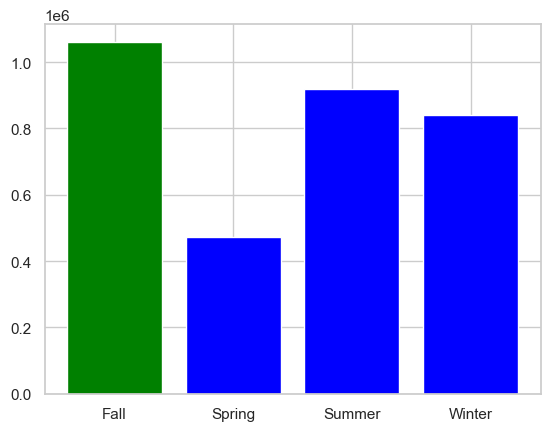

In [81]:
# visualisasi data perental berdasarkan season
# Temukan indeks bar dengan frekuensi paling tinggi
max_index = np.argmax(season)

# Tentukan warna untuk setiap bar
colors = ['blue' if i != max_index else 'green' for i in range(len(season))]

# Definisikan kategori dan data
categories = season.index
data = season.values

# Buat bar plot
plt.bar(categories, data, color=colors)

# Tampilkan plot
plt.show()

## Conclusion

- conclusion pertanyaan 1
Waktu atau hari yang tepat untuk promosi  adalah hari minggu karena pada hari minggu merupakan hari terendah perentalan terjadi. 
- conclusion pertanyaan 2
Tipe perental yang paling sering merental sepeda yaitu perental yang terdaftar dengan perbandingan 81.17% dan 18.83
- conclusion pertanyaan 3 
Musim memengaruhi orang untuk merental sepeda, terlihat pada diagram batang contoh perbedaan jumlah perental antara fall dan spring sangat signifikan